## TOP 10 Primary Crash Causes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import bqplot
import ipywidgets
import seaborn as sn

In [2]:
crash = pd.read_csv('Traffic_Crashes_Crashes.csv')

In [3]:
crash["CRASH_DATE"] = pd.to_datetime(crash["CRASH_DATE"])
crash_sub = crash[crash["CRASH_DATE"] >=pd.to_datetime('20200101')]
crash_sub = crash_sub[crash_sub["CRASH_DATE"] <=pd.to_datetime('20210101')]
crash_sub["Count"] = 1

In [4]:
crash_sub

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,Count
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,2020-07-10 10:25:00,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,3.0,0.0,10.0,6.0,7.0,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),1
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,2020-07-11 01:00:00,30.0,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,3.0,0.0,1.0,7.0,7.0,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011),1
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,2020-07-08 14:00:00,20.0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,1.0,0.0,14.0,4.0,7.0,NaN,NaN,NaN,1
7,f636d4a51a88015ac89031159b1f1952b8d92e49d11aeb...,JD293237,NaN,2020-07-10 22:20:00,30.0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,...,0.0,1.0,0.0,22.0,6.0,7.0,41.880386,-87.725807,POINT (-87.725807044026 41.880385884998),1
8,76aabcf7c2219a5c90259c96fe94b33834ddb53e0dbcd3...,JD291826,NaN,2020-07-09 17:06:00,10.0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,1.0,0.0,17.0,5.0,7.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225385,6912880436b418bf5b117c6c8fe5ff757eaac97d0d4f68...,JD416661,NaN,2020-10-31 14:45:00,30.0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,1.0,0.0,14.0,7.0,10.0,41.786848,-87.776871,POINT (-87.776871158589 41.786848203056),1
225388,6912f571afb1184efbfe3a941459f8821e052f8e250bd7...,JD351481,NaN,2020-08-31 11:20:00,15.0,NO CONTROLS,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,2.0,0.0,11.0,2.0,8.0,41.782089,-87.670489,POINT (-87.670489210713 41.782089455372),1
225392,691382609c6f69c8c156e32612049887bc2f643b10afcf...,JD462194,NaN,2020-12-18 02:14:00,20.0,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,1.0,0.0,2.0,6.0,12.0,41.904562,-87.726301,POINT (-87.726300783704 41.904562400787),1
225395,6913f8cc07b6c9d1dff672def4682b03202c3ad0872cae...,JD358362,NaN,2020-09-06 11:00:00,30.0,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,1.0,0.0,11.0,1.0,9.0,41.802373,-87.664655,POINT (-87.664654653962 41.802373227604),1


In [5]:
crash_sub2=pd.DataFrame()

In [6]:
crash_sub2["PRIM_CONTRIBUTORY_CAUSE"]=crash_sub["PRIM_CONTRIBUTORY_CAUSE"]
crash_sub2["Count"]=crash_sub["Count"]

In [7]:
crash_sub2

,PRIM_CONTRIBUTORY_CAUSE,Count
2,FAILING TO YIELD RIGHT-OF-WAY,1
3,UNABLE TO DETERMINE,1
4,UNABLE TO DETERMINE,1
7,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",1
8,UNABLE TO DETERMINE,1
...,...,...
225385,UNABLE TO DETERMINE,1
225388,FOLLOWING TOO CLOSELY,1
225392,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,1
225395,UNABLE TO DETERMINE,1


In [8]:
cause = crash_sub2.groupby("PRIM_CONTRIBUTORY_CAUSE").sum().reset_index()
cause = cause.sort_values(by='Count',ascending=False)

In [9]:
cause_10=cause.reset_index()

In [10]:
cause_10=cause_10[:10]
cause_10

,index,PRIM_CONTRIBUTORY_CAUSE,Count
0,34,UNABLE TO DETERMINE,15796
1,16,FAILING TO YIELD RIGHT-OF-WAY,4183
2,17,FOLLOWING TOO CLOSELY,3531
3,24,NOT APPLICABLE,2191
4,15,FAILING TO REDUCE SPEED TO AVOID CRASH,2041
5,21,IMPROPER OVERTAKING/PASSING,1706
6,19,IMPROPER BACKING,1512
7,20,IMPROPER LANE USAGE,1346
8,22,IMPROPER TURNING/NO SIGNAL,1214
9,12,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,1191


In [11]:
cause_10["PRIM_CONTRIBUTORY_CAUSE"].to_list()

['UNABLE TO DETERMINE',
 'FAILING TO YIELD RIGHT-OF-WAY',
 'FOLLOWING TOO CLOSELY',
 'NOT APPLICABLE',
 'FAILING TO REDUCE SPEED TO AVOID CRASH',
 'IMPROPER OVERTAKING/PASSING',
 'IMPROPER BACKING',
 'IMPROPER LANE USAGE',
 'IMPROPER TURNING/NO SIGNAL',
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE']

/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]),
 <a list of 10 Text major ticklabel objects>)

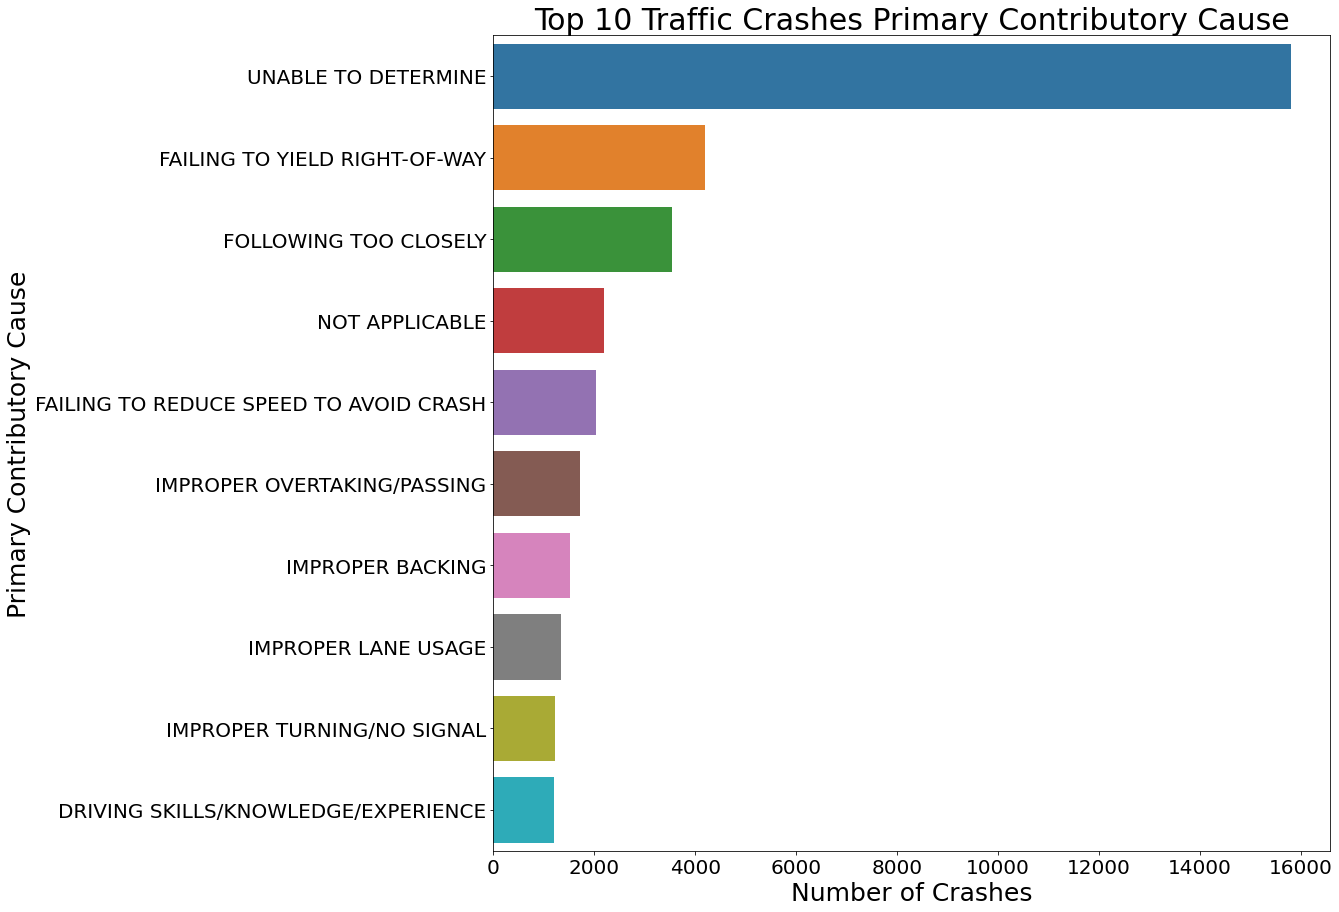

In [29]:
# Bar graph of the top 15 PRIMARY_CONTRIBUTORY

plt.figure(figsize=(15,15))

y= cause_10["Count"].to_list()
x= cause_10["PRIM_CONTRIBUTORY_CAUSE"].to_list()

sn.barplot(y, x)
plt.title('Top 10 Traffic Crashes Primary Contributory Cause', size=30)
plt.ylabel("Primary Contributory Cause", size=25,rotation=90)
plt.xlabel("Number of Crashes", size=25)
plt.yticks(size=20)
plt.xticks(size=20)